Irena Vent

# Deep Learning

*   **dataset**: Airbnb
*   **obetivo**: predecir el precio de un Airbnb en España

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

In [2]:
def plot_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Descargamos dataset Airbnb

In [ ]:
# nos descargamos el dataset de OpenDataSoft
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"

--2022-06-07 08:22:41--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.249.199.226, 34.248.20.69
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.249.199.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [      <=>           ]  54.31M   714KB/s    in 2m 5s   

2022-06-07 08:24:49 (446 KB/s) - ‘airbnb-listings.csv’ saved [56950929]



In [ ]:
#!ls -lah

## Carga de dataset Airbnb-listings


In [5]:
data = pd.read_csv('/content/drive/MyDrive/airbnb-listings.csv', sep = ';')
pd.set_option('display.max_columns', None)
data.head(5)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,15141125,https://www.airbnb.com/rooms/15141125,20170407214119,2017-04-08,Panoramic charming studio!,"Charming bright and cosy studio in ""El Rastro""...",It's a bright and cosy studio located in the h...,"Charming bright and cosy studio in ""El Rastro""...",none,The studio is located in the remarkable neighb...,NaN,The closest metro is La latina which will take...,The full studio will be entirely to the guests...,I am delighted to preform the check in at the ...,NaN,https://a0.muscache.com/im/pictures/d1a2212d-c...,https://a0.muscache.com/im/pictures/d1a2212d-c...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/d1a2212d-c...,96019257,https://www.airbnb.com/users/show/96019257,Marina,2016-09-20,"Madrid, Community of Madrid, Spain",I have a serious addiction for traveling :0l! ...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/fffbb86e-5...,https://a0.muscache.com/im/pictures/fffbb86e-5...,NaN,2.0,2.0,"email,phone,facebook,reviews,jumio,government_id","Madrid, Comunidad de Madrid 28005, Spain",NaN,Embajadores,Centro,Madrid,Comunidad de Madrid,28005,Madrid,"Madrid, Spain",ES,Spain,40.407453,-3.707995,Loft,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Pets all...",NaN,50.0,NaN,NaN,100.0,20.0,2,15,2,1125,today,NaN,13,24,42,66,2017-04-07,30,2016-10-15,2017-03-31,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,moderate,2,5.11,"40.40745268477803,-3.7079954754432634","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,9470166,https://www.airbnb.com/rooms/9470166,20170407214119,2017-04-08,Comfortable penthouse in the center,"In the center, recently remodeled, comfortable...",Quiet and comfortable space where you can rela...,"In the center, recently remodeled, comfortable...",none,It belongs to the district center of Madrid wh...,A la misma distancia en tiempo podrás acceder ...,"The nearest Metro station is Tirso de Molina ,...","You will be alone, while you are in my flat an...",If you have any questions while you are in the...,Check ins after 21h to 22h have an extra cost ...,https://a0.muscache.com/im/pictures/3eb59287-8...,https://a0.muscache.com/im/pictures/3eb59287-8...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/3eb59287-8...,9885245,https://www.airbnb.com/users/show/9885245,Jorge,2013-11-08,"Madrid, Community of Madrid, Spain",NaN,within an hour,100.0,NaN,https://a0.muscache.com/im/users/9885245/profi...,https://a0.muscache.com/im/users/9885245/profi...,Hortaleza,13.0,13.0,"email,phone,reviews,jumio","Madrid, Comunidad de Madrid 28012, Spain",NaN,Embajadores,Centro,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,40.408316,-3.705006,Apartment,Entire ho

In [6]:
print('Tamaño del dataset "data" -->', data.shape)

Tamaño del dataset "data" --> (14001, 89)


## Carga de imágenes

In [7]:
n_images = np.load('/content/drive/MyDrive/images.npy')
was_loaded = np.load('/content/drive/MyDrive/was_loaded.npy')
no_loaded = np.count_nonzero(was_loaded == 0)

print('Tamaño n_images -->', n_images.shape)
print('Tamaño was_loaded -->', was_loaded.shape)
print('Número de muestras sin imágenes -->', no_loaded)

Tamaño n_images --> (14001, 224, 224, 3)
Tamaño was_loaded --> (14001,)
Número de muestras sin imágenes --> 2758


## Eliminar muestras sin imágenes en dataset "data" y "n_images"

In [8]:
# eliminamos muestras sin imagen del dataset 'data'
data_cheked_img = data[was_loaded == 1]

# eliminamos muestras sin imagen del dataset 'n_images'
load_n_images = n_images[was_loaded == 1]

"""
loaded = []
i = 0
for img in n_images:
  if was_loaded[i] == 1.0:
    loaded.append(img)
    i += 1
  else:
    i += 1
load_n_images = np.array(loaded)
"""

# mostramos datos eliminados
print('Tamaño del dataset "data_cheked_img" -->', data_cheked_img.shape)
print('Tamaño del dataset "load_n_images" -->', load_n_images.shape)
print('Número de muestras eliminadas -->', no_loaded)

Tamaño del dataset "data_cheked_img" --> (11243, 89)
Tamaño del dataset "load_n_images" --> (11243, 224, 224, 3)
Número de muestras eliminadas --> 2758


In [ ]:
#data_cheked_img.head(5)

## Exploración del dataset y pre-procesamiento de los datos

In [9]:
pd.set_option('display.max_rows', None)
data_cheked_img.head().T

,0,1,2,4,7
ID,15141125,9470166,17444981,499911,13440784
Listing Url,https://www.airbnb.com/rooms/15141125,https://www.airbnb.com/rooms/9470166,https://www.airbnb.com/rooms/17444981,https://www.airbnb.com/rooms/499911,https://www.airbnb.com/rooms/13440784
Scrape ID,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,Panoramic charming studio!,Comfortable penthouse in the center,Cosy Apartment SOL/LA LATINA,2 bedroom apartment downtown Madrid,Double Room in Center (Lavapies)
Summary,"Charming bright and cosy studio in ""El Rastro""...","In the center, recently remodeled, comfortable...",Nice apartment near Sol and La Latina. Perfect...,NaN,"Double room in the center, Lavapies multicultu..."
Space,It's a bright and cosy studio located in the h...,Quiet and comfortable space where you can rela...,Is a really cosy apartment with the best locat...,Bright and airy apartment in Central Madrid re...,NaN
Description,"Charming bright and cosy studio in ""El Rastro""...","In the center, recently remodeled, comfortable...",Nice apartment near Sol and La Latina. Perfect...,Bright and airy apartment in Central Madrid re...,"Double room in the center, Lavapies multicultu..."
Experiences Offered,none,none,none,none,none
Neighborhood Overview,The studio is located in the remarkable neighb...,It belongs to the district center of Madrid wh...,"La Latina is well known by El Rastro, the most...",NaN,NaN


Observamos que una gran parte de las variables no nos aportan información relevante. Por lo que decidimos eliminar las siguientes variables:

* ID
* Listing Url
* Scrape ID
* Last Scaped
* Name
* Summary - se podría tener en cuenta con NLP
* Space - se podría tener en cuenta con NLP
* Description - se podría tener en cuenta con NLP
* Experience Offerd - se podría tener en cuenta con NLP
* Neighborhood Overview - se podría tener en cuenta con NLP
* Notes - se podría tener en cuenta con NLP
* Transit - se podría tener en cuenta con NLP
* Access - se podría tener en cuenta con NLP
* Interaction - se podría tener en cuenta con NLP
* House Rules
* Thumbnail Url
* Medium Url
* Picture Url - ya tenemos las imágenes descargads;
* XL Picture Url - ídem;
* Host ID
* Host URL
* Host Name
* Host Since
* Host Location
* Host About - se podría tener en cuenta con NLP;
* Host Thumbnail Url
* Host Picture Url
* Host Neighbourhood
* Host Listings Count
* Host Total Listings Count
* Host Verifications
* Street - informacion redundante (mantenemos City);
* State - informacion redundante (mantenemos City);
* Market - informacion redundante (mantenemos City);
* Smart Location - informacion redundante (mantenemos City);
* Country Code - todas las muestras perteneces a ES
* Country - todas las muestras perteneces a Spain
* Weekly Price - valores redundantes
* Monthly Price - valores redundantes
* Calendar Update
* Calendar last Scraped
* First review
* Last review
* License
* Jurisdiction Name
* Calculated host listings count
* Reviews per Month - valores redundantres
* Geolocation
* Features - se podría tener en cuenta con NLP


In [10]:
data_filtered = data_cheked_img.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 
                                      'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 
                                      'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 
                                      'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Thumbnail Url', 
                                      'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 'Host Total Listings Count', 
                                      'Host Total Listings Count', 'Host Verifications', 'Street', 'State', 'Market', 'Smart Location', 
                                      'Country Code', 'Country', 'Weekly Price', 'Monthly Price', 'Calendar Updated','Calendar last Scraped', 
                                      'First Review', 'Last Review', 'License', 'Jurisdiction Names', 'Calculated host listings count', 
                                      'Reviews per Month','Geolocation', 'Features'], axis = 1)

In [11]:
data_filtered.shape

(11243, 40)

In [12]:
data_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,9884.0,96.135876,12.799912,0.000000,100.000000,100.000000,100.000000,100.000000
Host Acceptance Rate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,11243.0,40.430917,0.181328,39.317472,40.409705,40.419258,40.429490,41.434567
Longitude,11243.0,-3.454676,1.198039,-3.863907,-3.708086,-3.701096,-3.688899,3.467897
Accommodates,11243.0,3.125500,2.009759,1.000000,2.000000,2.000000,4.000000,16.000000
Bathrooms,11206.0,1.264546,0.627177,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,11221.0,1.300686,0.836206,0.000000,1.000000,1.000000,1.000000,10.000000
Beds,11204.0,1.970546,1.549973,1.000000,1.000000,1.000000,2.000000,16.000000
Square Feet,401.0,369.306733,553.142213,0.000000,0.000000,85.000000,646.000000,3767.000000
Price,11239.0,65.972773,63.041889,9.000000,30.000000,50.000000,80.000000,850.000000


In [13]:
data_filtered.dtypes

Host Response Time               object
Host Response Rate              float64
Host Acceptance Rate            float64
Neighbourhood                    object
Neighbourhood Cleansed           object
Neighbourhood Group Cleansed     object
City                             object
Zipcode                          object
Latitude                        float64
Longitude                       float64
Property Type                    object
Room Type                        object
Accommodates                      int64
Bathrooms                       float64
Bedrooms                        float64
Beds                            float64
Bed Type                         object
Amenities                        object
Square Feet                     float64
Price                           float64
Security Deposit                float64
Cleaning Fee                    float64
Guests Included                   int64
Extra People                      int64
Minimum Nights                    int64


In [14]:
data_filtered.isnull().sum()

Host Response Time               1359
Host Response Rate               1359
Host Acceptance Rate            11243
Neighbourhood                    4049
Neighbourhood Cleansed              0
Neighbourhood Group Cleansed      180
City                                5
Zipcode                           389
Latitude                            0
Longitude                           0
Property Type                       0
Room Type                           0
Accommodates                        0
Bathrooms                          37
Bedrooms                           22
Beds                               39
Bed Type                            0
Amenities                         129
Square Feet                     10842
Price                               4
Security Deposit                 6599
Cleaning Fee                     4689
Guests Included                     0
Extra People                        0
Minimum Nights                      0
Maximum Nights                      0
Has Availabi

## Observaiones

**Tipos de variables**

* Existen variables como Neighbourhood, Neighbourhood Cleansed, Neighbourhood, Amenities, etc. del tipo *object* que deben ser transformadas y/o categorizadas;

**Valores nulos**

* Las variables Host Acceptance Rate y Has Availability pueden ser elmiminadas dado que la totalidad de las muestras presentan valores ausentes;
* La variable Square Feet presenta el 96% de su valores ausentes, del total de muestras, decidimos eliminar la varaible;
* La varible Zipcode parece tener datos erróneos, reisar y considerar la posibilidad de eliminar dicha varible, manteniendo Neighbourhood como varible representativa;
* Sobre las variables Neighbourhood, Neighbourhood Cleansed y Neighbourhood Group Cleansed se puede hacer un análisis pormenorizado para tomar la decisión de cuál de las tres varaibles podemos usar para el posterior estudio y si es necesario realizar algún tipo de clustering para optimizar;
* Todas las variables Review excepto Number of Reviews, presentan valores ausentes, la imputación según los datos, puede ser a través de la media o moda. Pero sería necesario valorar la opción de eliminar alguna de dichas variables con un estudio de correlaciones;
* Imputar los valores ausentes con la moda en Bed, Bedroom y Bathroom, el 75% de la muestra está dentro del rango, pues parece haber algún outlier;
* La variable objetivo Price tiene 4 muestras con valores ausentes, decidimos imputar dichas muestras con la media, prevío estudio a los psoibles outliers;

## Gráfico de correlaciones: eliminar variables altamente correladas

**Nota importante**: en este gráfico no aparecen las variables **object**, pero tomamos la decisión de comprobar las correlaciones antes de la imputación para ver si entre las variables numéricas existentes (en este punto del desarrollo) puede haber variables altamente correladas;

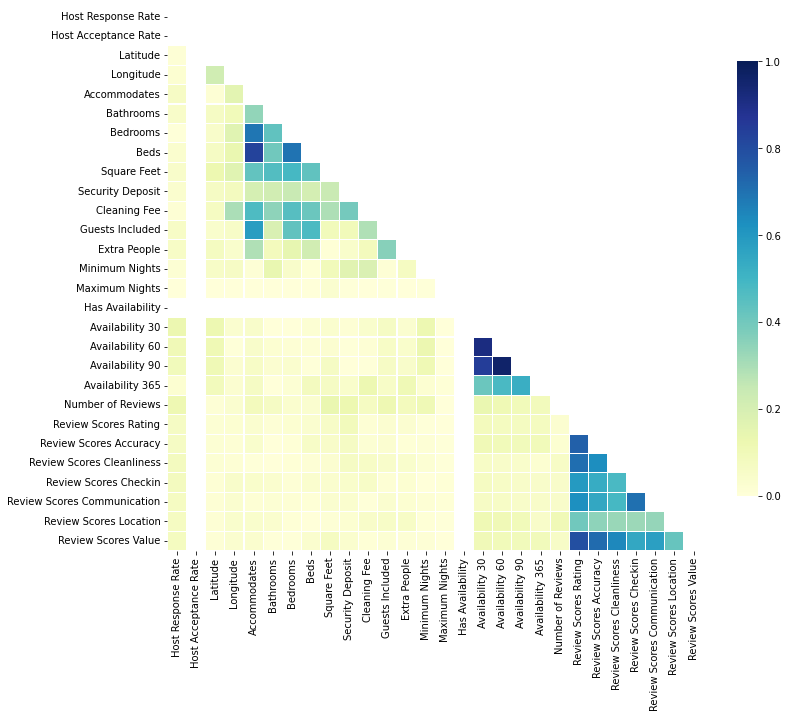

In [15]:
import seaborn as sns

corr = np.abs(data_filtered.drop(['Price'], axis=1).corr())

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

## Observaiones

* Accommodates y Bed están alatamente correlacionadas, por lo que puede haber problemas de colinealidad, decidimos eliminar Accommodates
* Vemos que las variables Review tienen una alta correlaciones, lo que haremos es generar una variable nueva que será la media de todas las Review
* Ocurre lo mismo con Avialability pero lo que haremos en este caso es quedarnos sólo con la variables Avialability 365


In [16]:
# generamos nueva variable Average Review
reviews = data_filtered.loc[: , "Review Scores Rating":"Review Scores Value"]
data_filtered['Average Review'] = reviews.mean(axis=1)

data_filtered.drop(['Host Response Time', 'Host Response Rate', 'Availability 30', 'Availability 60', 'Availability 90',
                    'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 
                    'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Neighbourhood',
                    'Neighbourhood Group Cleansed', 'Accommodates', 'Host Acceptance Rate', 'Has Availability', 
                    'Square Feet', 'City', 'Zipcode', 'Maximum Nights' ], axis=1, inplace=True)

In [17]:
data_filtered.shape

(11243, 20)

In [18]:
data_filtered.columns

Index(['Neighbourhood Cleansed', 'Latitude', 'Longitude', 'Property Type',
       'Room Type', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities',
       'Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Availability 365',
       'Number of Reviews', 'Cancellation Policy', 'Average Review'],
      dtype='object')

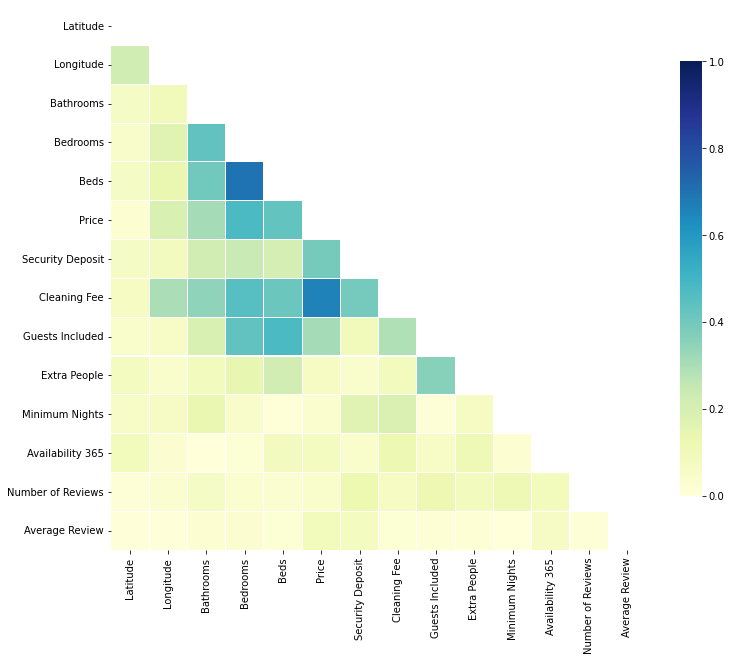

In [19]:
import seaborn as sns

corr = np.abs(data_filtered.corr())

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [ ]:
#data_filtered.describe().T

## Transformación y categorización de variables



In [20]:
data_filtered.dtypes

Neighbourhood Cleansed     object
Latitude                  float64
Longitude                 float64
Property Type              object
Room Type                  object
Bathrooms                 float64
Bedrooms                  float64
Beds                      float64
Bed Type                   object
Amenities                  object
Price                     float64
Security Deposit          float64
Cleaning Fee              float64
Guests Included             int64
Extra People                int64
Minimum Nights              int64
Availability 365            int64
Number of Reviews           int64
Cancellation Policy        object
Average Review            float64
dtype: object

In [21]:
columns = ['Room Type', 'Bed Type', 'Cancellation Policy', 'Property Type']

for column in columns:
    print (f'{column} --> {data_filtered[column].unique()}')
    print (f'{column} --> {len(data_filtered[column].unique())}')
    print (data_filtered[column].value_counts())

Room Type --> ['Entire home/apt' 'Private room' 'Shared room']
Room Type --> 3
Entire home/apt    6267
Private room       4797
Shared room         179
Name: Room Type, dtype: int64
Bed Type --> ['Real Bed' 'Futon' 'Pull-out Sofa' 'Couch' 'Airbed']
Bed Type --> 5
Real Bed         11014
Pull-out Sofa      189
Futon               28
Couch                9
Airbed               3
Name: Bed Type, dtype: int64
Cancellation Policy --> ['moderate' 'strict' 'flexible' 'super_strict_30' 'super_strict_60']
Cancellation Policy --> 5
strict             4232
flexible           3672
moderate           3302
super_strict_60      19
super_strict_30      18
Name: Cancellation Policy, dtype: int64
Property Type --> ['Loft' 'Apartment' 'Condominium' 'Bed & Breakfast' 'House' 'Other'
 'Hostel' 'Guesthouse' 'Dorm' 'Chalet' 'Boutique hotel'
 'Serviced apartment' 'Villa' 'Guest suite' 'Casa particular' 'Tent'
 'Townhouse' 'Earth House' 'Bungalow' 'Camper/RV' 'Boat' 'Timeshare']
Property Type --> 22
Apartment   

## Observaciones y decisiones:


* Room Type pasará a ser variable numérica con 3 valores;
* Bed Type pasará a ser variable numérica con 3 valores, dado que las 2 primeros grupos explican el 99% de las muestras, las tres últimas pasaran a formar un sólo grupo;
* Cancellation Policy pasará a ser variable numérica con 4 valores, super_strict_60 y super_strict_30 se van a agrupar en un único grupo, que representará al nuevo grupo super-strict;
* Property Type pasará a ser variable numérica con 7 valores, dado que los 6 primeros grupos explican más del 98% de las muestras, es decir, el resto de grupos pasaran a formar un solo grupo el de new_other;

Room, Bad Property Type, Cancellation Policy y Neighbourhood Cleansed se condificaran mediante **MeanEncoder**

* Amenities - observamos que es un varaibles separada por ',' por lo que podemos extraer el numero de palabras por cada muestra, usándolo como una caracterísitca/variable


In [22]:
# Unificamos grupos 
data_filtered['Bed Type'] = data_filtered['Bed Type'].str.replace('Futon', 'Other')
data_filtered['Bed Type'] = data_filtered['Bed Type'].str.replace('Couch', 'Other')
data_filtered['Bed Type'] = data_filtered['Bed Type'].str.replace('Airbed', 'Other')

data_filtered['Cancellation Policy'] = data_filtered['Cancellation Policy'].str.replace('super_strict_60', 'super_strict')
data_filtered['Cancellation Policy'] = data_filtered['Cancellation Policy'].str.replace('super_strict_30', 'super_strict')

p_types = ['Chalet', 'Guesthouse', 'Dorm', 'Boutique hotel', 'Hostel', 'Serviced apartment',
          'Townhouse', 'Guest suite', 'Earth House', 'Tent', 'Timeshare', 'Villa', 'Casa particular',
          'Camper/RV', 'Bungalow', 'Boat']

for p_type in p_types:
    data_filtered['Property Type'] = data_filtered['Property Type'].str.replace(p_type, 'new_Other')

In [23]:
# Codificamos Room, Bed, Property Type, Cancellation Policy y Neighbourhood Cleansed
def calc_mean(df, by, on, m):
   
    mean = data_filtered[on].mean()

    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    smooth = (counts * means + m * mean) / (counts + m)

    return df[by].map(smooth)

columns = ['Room Type', 'Bed Type', 'Property Type', 'Cancellation Policy', 'Neighbourhood Cleansed']

for column in columns:
  data_filtered[column] = calc_mean(data_filtered, by=column, on='Price', m=data_filtered.shape[0])

"""
data_filtered['Room Type'] = calc_mean(data_filtered, by='Room Type', on='Price', m=data_filtered.shape[0])
data_filtered['Bed Type'] = calc_mean(data_filtered, by='Neighbourhood Cleansed', on='Price', m=data_filtered.shape[0])
data_filtered['Property Type'] = calc_mean(data_filtered, by='Property Type', on='Price', m=data_filtered.shape[0])
data_filtered['Cancellation Policy'] = calc_mean(data_filtered, by='Cancellation Policy', on='Price', m=data_filtered.shape[0])
data_filtered['Neighbourhood Cleansed'] = calc_mean(data_filtered, by='Neighbourhood Cleansed', on='Price', m=data_filtered.shape[0])
"""

# Codificamos Amenities
df_l = data_filtered[['Amenities']]
df_l.fillna("", inplace=True)
df_l['Amenities'] = df_l['Amenities'].apply(lambda x: len(str(x).split(',')))

data_filtered['Amenities'].fillna("", inplace=True)
data_filtered['Amenities'] = data_filtered['Amenities'].apply(lambda x: len(str(x).split(',')))

## Imputación de valores ausentes y tratamiento de outliers


In [24]:
data_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
Neighbourhood Cleansed,11243.0,65.933053,0.515069,64.802261,65.782766,65.941109,66.343820,66.900008
Latitude,11243.0,40.430917,0.181328,39.317472,40.409705,40.419258,40.429490,41.434567
Longitude,11243.0,-3.454676,1.198039,-3.863907,-3.708086,-3.701096,-3.688899,3.467897
Property Type,11243.0,66.121687,0.225544,65.212046,66.120813,66.120813,66.120813,66.632433
Room Type,11243.0,66.844216,7.753089,57.937205,57.937205,73.703044,73.703044,73.703044
Bathrooms,11206.0,1.264546,0.627177,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,11221.0,1.300686,0.836206,0.000000,1.000000,1.000000,1.000000,10.000000
Beds,11204.0,1.970546,1.549973,1.000000,1.000000,1.000000,2.000000,16.000000
Bed Type,11243.0,66.147276,0.059463,65.710540,66.155749,66.155749,66.155749,66.155749
Amenities,11243.0,14.344659,4.868576,1.000000,11.000000,14.000000,18.000000,34.000000


In [25]:
data_filtered.isnull().sum()

Neighbourhood Cleansed       0
Latitude                     0
Longitude                    0
Property Type                0
Room Type                    0
Bathrooms                   37
Bedrooms                    22
Beds                        39
Bed Type                     0
Amenities                    0
Price                        4
Security Deposit          6599
Cleaning Fee              4689
Guests Included              0
Extra People                 0
Minimum Nights               0
Availability 365             0
Number of Reviews            0
Cancellation Policy          0
Average Review            2415
dtype: int64

## Observaciones 

**Valores ausentes**

* Bathrooms, Bedroomsmm, Beds, Security Deposit y Cleaning Fee pueden ser imputadas con la moda/most_frequent;
* Vemos que la variable Bathrooms tiene muestras con 0, puede ser conveniente, depndiendo del número de muestras, imputar dichos valores;
* Average Review será imputada con la media;
* Price (4) será imputada con la media;

**Outliers**

* Bathrooms, Bedroomsmm, Beds, Price, Security Deposit, Cleaning Fee, Guests Included y Extra People parecen tener outliers. Graficaremos la distribución de valores y filtraremos los datos eliminando las muestras más dispares; 

In [26]:
print('Número de muestras con valor Bathrooms = 0 -->', (data_filtered['Bathrooms'] == 0).sum())

Número de muestras con valor Bathrooms = 0 --> 57


In [27]:
data_filtered.loc[data_filtered['Bathrooms'] == 0,'Bathrooms'] = np.nan
print('Número de muestras con valor Bathrooms = 0 -->', (data_filtered['Bathrooms'] == 0).sum())

Número de muestras con valor Bathrooms = 0 --> 0


In [28]:
from sklearn.impute import SimpleImputer

# Imputamos valores con most_frequent
imputer_mf = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imputer_mf_1 = imputer_mf.fit(data_filtered[['Bathrooms']])
imputer_mf_2 = imputer_mf.fit(data_filtered[['Bedrooms']])
imputer_mf_3 = imputer_mf.fit(data_filtered[['Beds']])
imputer_mf_4 = imputer_mf.fit(data_filtered[['Security Deposit']])
imputer_mf_5 = imputer_mf.fit(data_filtered[['Cleaning Fee']])

data_filtered[['Bathrooms']] = imputer_mf_1.transform(data_filtered[['Bathrooms']])
data_filtered[['Bedrooms']] = imputer_mf_2.transform(data_filtered[['Bedrooms']])
data_filtered[['Beds']] = imputer_mf_3.transform(data_filtered[['Beds']])
data_filtered[['Security Deposit']] = imputer_mf_4.transform(data_filtered[['Security Deposit']])
data_filtered[['Cleaning Fee']] = imputer_mf_5.transform(data_filtered[['Cleaning Fee']])

# Imputamos valores con mean
imputer_mn = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer_mn_1 = imputer_mn.fit(data_filtered[['Price']])
imputer_mn_2 = imputer_mn.fit(data_filtered[['Average Review']])

data_filtered[['Price']] = imputer_mn_1.transform(data_filtered[['Price']])
data_filtered[['Average Review']] = imputer_mn_2.transform(data_filtered[['Average Review']])

### Outliers

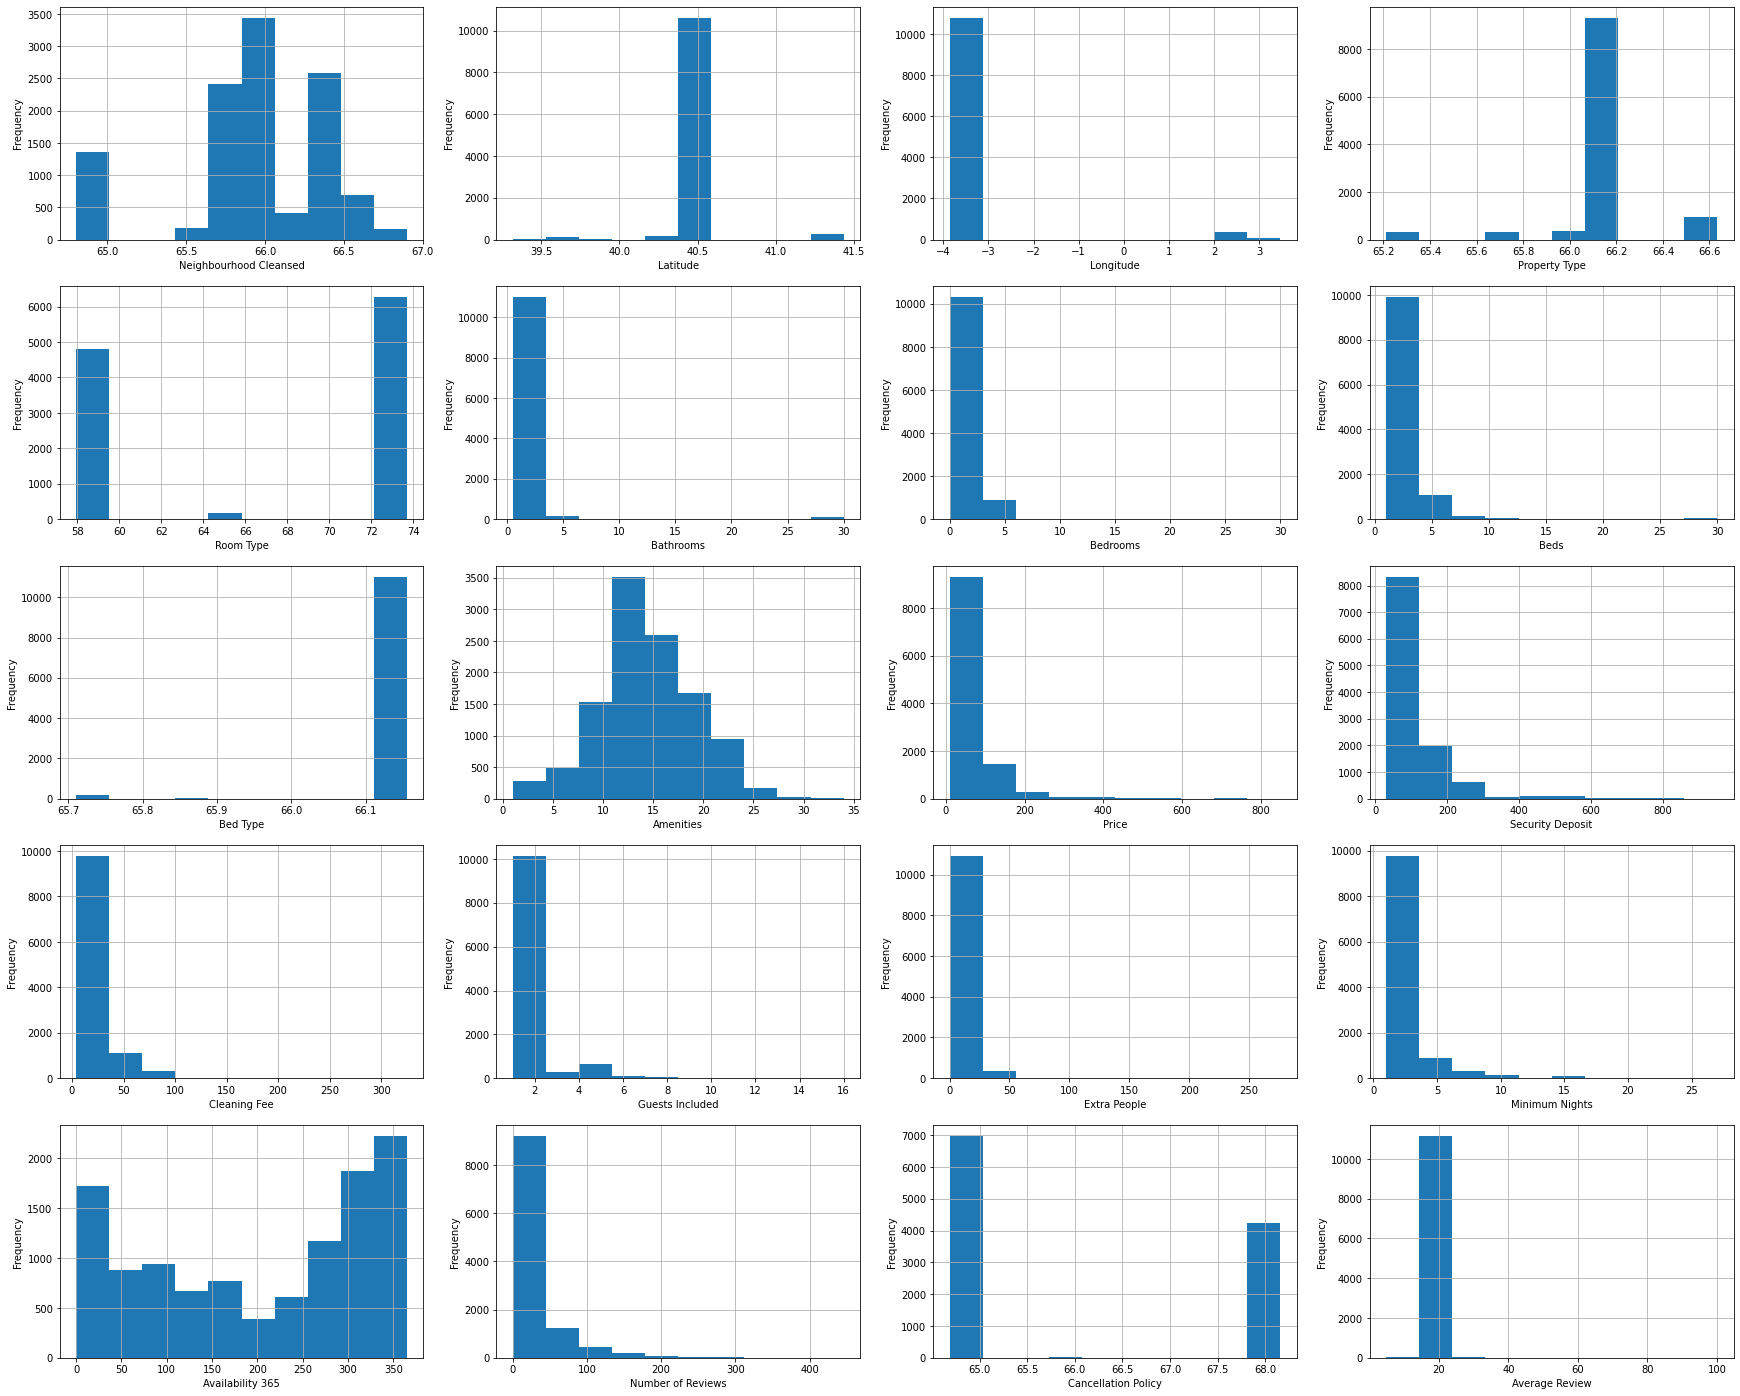

In [29]:
columns = data_filtered.columns
plt.figure(figsize=(30, 30))

for n, col in enumerate(columns):
    plt.subplot(6,4,n+1)
    data_filtered[col].plot.hist(grid = True)
    plt.axis()
    plt.xlabel(col)

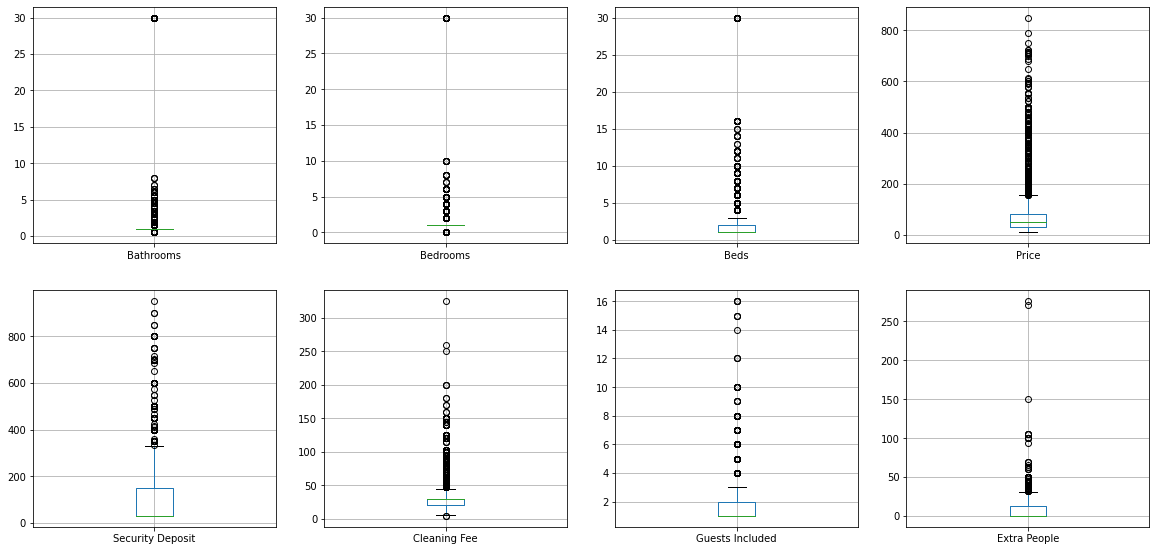

In [30]:
columns = ['Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Security Deposit',
           'Cleaning Fee', 'Guests Included', 'Extra People']

plt.figure(figsize=(20, 20))

for n, col in enumerate(columns):
    plt.subplot(4,4,n+1)
    data_filtered.boxplot(col)

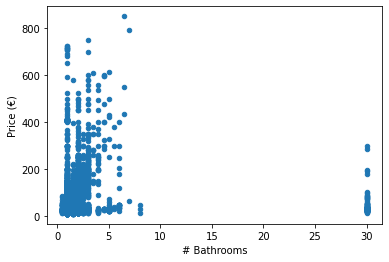

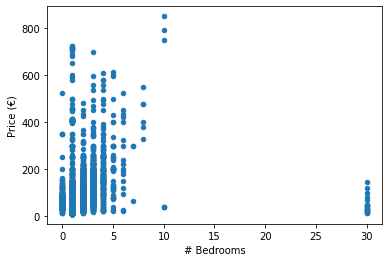

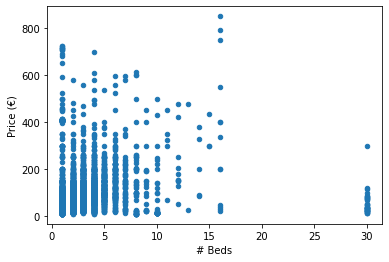

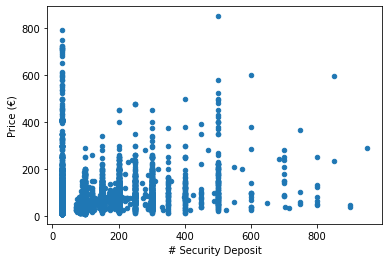

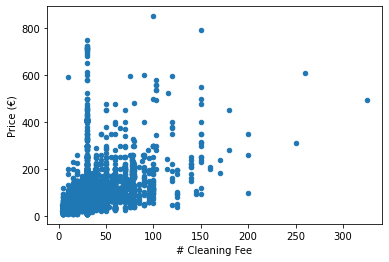

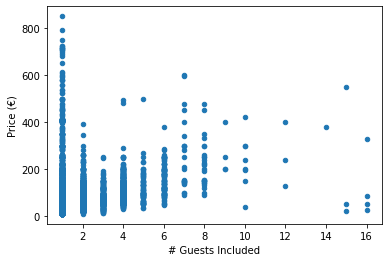

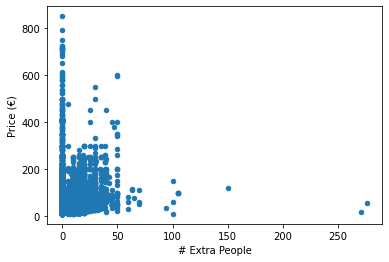

In [31]:
data_filtered.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('# Bathrooms')
plt.ylabel('Price (€)')
plt.show()

data_filtered.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('# Bedrooms')
plt.ylabel('Price (€)')
plt.show()

data_filtered.plot(kind = 'scatter',x='Beds',y = 'Price')
plt.xlabel('# Beds')
plt.ylabel('Price (€)')
plt.show()

data_filtered.plot(kind = 'scatter',x='Security Deposit',y = 'Price')
plt.xlabel('# Security Deposit')
plt.ylabel('Price (€)')
plt.show()

data_filtered.plot(kind = 'scatter',x='Cleaning Fee',y = 'Price')
plt.xlabel('# Cleaning Fee')
plt.ylabel('Price (€)')
plt.show()

data_filtered.plot(kind = 'scatter',x='Guests Included',y = 'Price')
plt.xlabel('# Guests Included')
plt.ylabel('Price (€)')
plt.show()

data_filtered.plot(kind = 'scatter',x='Extra People',y = 'Price')
plt.xlabel('# Extra People')
plt.ylabel('Price (€)')
plt.show()

In [79]:
# Hacemos reset del index del dataset
data_filtered.reset_index(drop=True, inplace=True)

# almacenamos los índices eliminados de 'data_filtered' 
# que posteriormente usaremos para eliminar 
# las muestras del dataset load_n_images


index_Bath = data_filtered.index[data_filtered['Bathrooms'] >= 10].tolist()
index_Bed = data_filtered.index[data_filtered['Bedrooms'] >= 10].tolist()
index_Beds = data_filtered.index[data_filtered['Beds'] >= 15].tolist()
index_Deposit = data_filtered.index[data_filtered['Security Deposit'] >= 800].tolist()
index_Clean = data_filtered.index[data_filtered['Cleaning Fee'] >= 200].tolist()
index_Guests = data_filtered.index[data_filtered['Guests Included'] >= 9].tolist()
index_Extra = data_filtered.index[data_filtered['Extra People'] >= 90].tolist()
index_Price = data_filtered.index[data_filtered['Price'] >= 500].tolist()
"""
index_Bath = data_filtered.query("Bathrooms > 6").index.tolist()
index_Bed = data_filtered.query("Bedrooms > 6").index.tolist()
index_Beds = data_filtered.query("Beds > 10").index.tolist()
index_Price = data_filtered.query("Price > 500").index.tolist()
"""
# las muestras del dataset load_n_images
index_list = np.unique(np.concatenate((index_Bath, index_Bed, index_Beds, index_Deposit, index_Clean, index_Guests, index_Extra, index_Price),0))

#print(index_list)
print('Número de muestras eliminadas --> ',(len(index_list)))

Número de muestras eliminadas -->  221


In [ ]:
# Eliminamos outliers
data_filtered = data_filtered[data_filtered['Bathrooms'] <= 10]
data_filtered = data_filtered[data_filtered['Bedrooms'] <= 10]
data_filtered = data_filtered[data_filtered['Beds'] <= 10]
data_filtered = data_filtered[data_filtered['Price'] <= 200]

print(f'Porcentaje de muestras eliminadas: {round((len(index_list))/data_filtered.shape[0]*100,4)} %')
print(f'Tamaño df_train: {data_filtered.shape}')

Porcentaje de muestras eliminadas: 0.0 %
Tamaño df_train: (10989, 20)


In [ ]:
# Eliminamos las imágenes pertenecietes a los outliers
loaded = []
i = 0

for img in load_n_images:
  if i not in index_list:
    loaded.append(img)
    i += 1
  else:
    i += 1

load_n_images = np.array(loaded)
print('Tamaño del dataset "load_n_images" tras eliminar outliers -->', load_n_images.shape)

Tamaño del dataset "load_n_images" tras eliminar outliers --> (11049, 224, 224, 3)


In [ ]:
df.index[df['column_name']==value].tolist()

In [ ]:
data_filtered.head(5)

,Neighbourhood Cleansed,Latitude,Longitude,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Availability 365,Number of Reviews,Cancellation Policy,Average Review
0,64.802261,40.407453,-3.707995,66.112932,73.703044,1.0,0.0,1.0,64.802261,15,50.0,100.0,20.0,2,15,2,66,30,64.684673,22.285714
1,64.802261,40.408316,-3.705006,66.120813,73.703044,1.0,1.0,2.0,64.802261,16,50.0,250.0,15.0,2,25,1,347,97,68.158054,18.857143
2,64.802261,40.413722,-3.706823,66.120813,73.703044,1.5,1.0,2.0,64.802261,18,77.0,NaN,25.0,1,0,1,155,7,64.684673,21.000000
4,64.802261,40.412556,-3.701155,66.120813,73.703044,1.0,2.0,4.0,64.802261,10,95.0,200.0,60.0,4,0,4,237,72,68.158054,22.428571
7,64.802261,40.408358,-3.704043,66.120813,57.937205,1.5,1.0,1.0,64.802261,16,30.0,NaN,NaN,1,0,1,0,2,64.684673,18.571429


In [ ]:
data_filtered.iloc[[3]]

,Neighbourhood Cleansed,Latitude,Longitude,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Availability 365,Number of Reviews,Cancellation Policy,Average Review
4,64.802261,40.412556,-3.701155,66.120813,73.703044,1.0,2.0,4.0,64.802261,10,95.0,200.0,60.0,4,0,4,237,72,68.158054,22.428571


In [ ]:
index_list = data_filtered.query("Price > 400").index.tolist()
print(index_list)
print(len(index_list))

[277, 437, 444, 614, 673, 675, 1109, 1340, 1358, 1433, 1463, 1902, 1903, 2166, 2224, 2269, 2379, 2532, 2871, 3345, 3352, 3383, 3684, 4061, 4711, 4848, 5052, 5077, 5078, 5191, 5207, 5549, 5743, 5748, 6125, 6130, 6192, 6249, 6424, 6686, 6727, 7029, 7066, 7139, 7427, 7480, 7489, 7548, 7816, 7841, 7888, 7964, 8093, 8200, 8342, 8612, 8713, 8958, 8989, 9089, 9161, 9588, 10005, 10030, 10155, 10436, 10472, 10493, 10576, 10601, 10740, 10793, 10798, 11011, 11066, 11254, 11287, 11587, 11627, 11628, 11637, 11859, 12058, 12080, 12211, 12460, 12553, 12731, 12813, 13203, 13312, 13315, 13501, 13713, 13849, 13852, 13862]
97


In [ ]:
prueba = data_filtered

In [ ]:
data_filtered.reset_index(drop=True, inplace=True)
#prueba.head()

index_list = data_filtered.query("Price >= 400").index.tolist()
print(index_list)
print(len(index_list))

[213, 347, 354, 502, 545, 547, 894, 1079, 1096, 1159, 1178, 1527, 1528, 1746, 1791, 1825, 1915, 1952, 2031, 2285, 2663, 2670, 2691, 2938, 3252, 3792, 3905, 4059, 4078, 4079, 4173, 4189, 4449, 4600, 4604, 4925, 4930, 4981, 4985, 5021, 5160, 5365, 5397, 5637, 5665, 5728, 5953, 5998, 6004, 6053, 6274, 6296, 6338, 6405, 6501, 6590, 6697, 6909, 6988, 7173, 7200, 7282, 7345, 7372, 7410, 7694, 8038, 8063, 8151, 8374, 8410, 8429, 8484, 8506, 8614, 8659, 8664, 8823, 8870, 9008, 9036, 9096, 9270, 9305, 9306, 9315, 9485, 9634, 9654, 9766, 9961, 10038, 10185, 10259, 10582, 10669, 10672, 10831, 11001, 11108, 11111, 11121]
102


In [ ]:
data_filtered.iloc[[213]]

,Neighbourhood Cleansed,Latitude,Longitude,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Availability 365,Number of Reviews,Cancellation Policy,Average Review,Review Scores Rating,Review Scores Cleanliness
213,65.96142,40.469632,-3.700232,66.632433,57.937205,1.0,1.0,1.0,65.96142,1,404.0,30.0,30.0,1,0,1,179,0,64.899336,21.338291,30.0,30.0


In [ ]:
zeta = load_n_images
zeta.shape

(11243, 224, 224, 3)

In [ ]:
l = []
i = 0

for z in zeta:
  if i not in index_list:
    l.append(z)
    i += 1
  else:
    i += 1

l_n_images = np.array(l)


print('Tamaño del dataset "load_n_images" -->', l_n_images.shape)

Tamaño del dataset "load_n_images" --> (11146, 224, 224, 3)


In [ ]:
zeta.shape

(1692386303,)

In [ ]:
# concatenar listas sin repetir valores

import numpy as np
a=np.array([1,6,56,120,162,170,176,179,197,204])
b=np.array([29,31,56,104,162,170,176,179,197,204])
c=np.array([1,2,197,204])
new_array = np.unique(np.concatenate((a,b,c),0))

print(new_array)

[  1   2   6  29  31  56 104 120 162 170 176 179 197 204]


In [ ]:
from sklearn.model_selection import train_test_split

#full_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')
train, test = train_test_split(data_prueba, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

df_train = pd.read_csv('./train.csv', sep=';', decimal='.')

In [ ]:
#full_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')
train, test = train_test_split(load_n_images, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

In [ ]:
data_withoutIMG = data[was_loaded == 0]
data_withoutIMG.shape

(2758, 89)

In [ ]:
print(n_images.shape)
print(was_loaded.shape)

(14001, 224, 224, 3)
(14001,)


In [ ]:
prueba = np.delete(was_loaded, np.where(was_loaded==0))

In [ ]:
prueba.shape

(11243,)

In [ ]:
images_prueba=n_images

In [ ]:
images_prueba.shape

(14001, 224, 224, 3)

In [ ]:
#images_prueba[11000, :,:,:]

In [ ]:
#for i in range(0,1000, 1):
  #print(was_loaded[i])


In [ ]:
cargadas = []
i = 0

for img in n_images:
  if was_loaded[i] == 1.0:
    cargadas.append(img)
    i += 1
  else:
    i += 1

arr = np.array(cargadas)

In [ ]:
arr.shape

(11243, 224, 224, 3)

In [ ]:
was_loaded[3] == 1.0

False